<a href="https://colab.research.google.com/github/shivi8302/OIBSIP/blob/main/FD_Task3_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LODING LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

##Load Data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##Check for Class Imbalance

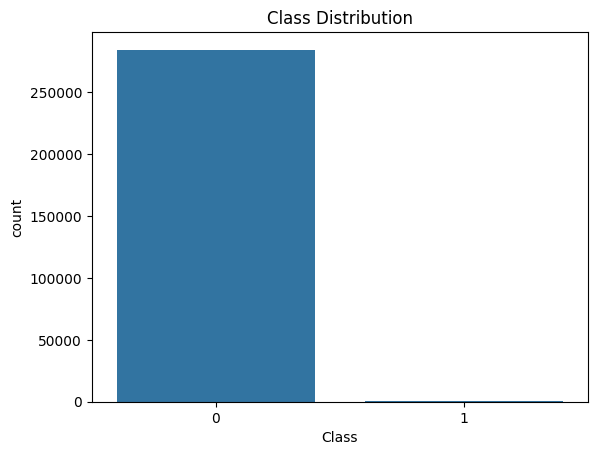

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [ ]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

##Train-test split

In [ ]:
df.dropna(subset = ['Class'], inplace = True)
x = df.drop('Class', axis = 1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
print("Data split into training and testing sets successfully.")

Data split into training and testing sets successfully.


In [ ]:
x = df.drop('Class', axis = 1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

##Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

#Predictions

In [ ]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

##Evalution metrics

In [ ]:
print("\nClassifiction Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))


Classifiction Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.67      0.73        98

    accuracy                           1.00     56962
   macro avg       0.90      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56848    16]
 [   32    66]]

Accuracy Score: 0.9991573329588147

ROC AUC Score: 0.9457816645228716


#Real-time fraud detection simultion

In [ ]:
sample_transaction = x_test.iloc[0].values.reshape(1, -1)
pred = model.predict(sample_transaction)
if pred[0] == 1:
  print("Fraudulent Transaction")
else:
  print("Legitimate Transaction")

Legitimate Transaction


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
